# Optimización Bayesiana

**Teorema de Bayes**

$$ P(A|B) = \frac{P(B|A) P(A)}{P(B)} $$

$ P(A|B) $: Probabilidad condicional de A dado B. También conocida como la probabilidad posterior de A dado que B ocurre.

$ P(B|A) $: Probabilidad condicional de B dado A. Se interpreta como la verosimilitud (*likelihood*) de A.

$ P(A) $: Probabilidad de observar A. También conocida como probabilidad a priori.

$ P(B) $: Probabilidad de observar B. Interpretada como evidencia.

Utilizando las definiciones de arriba actualizamos la definición del teorema de bayes:

$$ \text{posterior} = \frac{(\text{verosimilitud})(\text{anterior})}{\text{evidencia}} $$

La intuición es que el teorema de Bayes es una herramienta para actualizar nuestras creencias dado lo que se tenía antes y nueva evidencia. Por ejemplo, tomas una moneda y asumes que es una moneda justa, dado que es lo más probable y que las monedas suelen ser justas en tu experiencia. Lanzas la moneda tres veces y cae sello las tres veces; un poco extraño, así que ajustas tus creencias y empiezas a imaginar que la moneda no es tan justa como debería ser. Lanzas las monedas tres veces y cae águila; ahora crees que la moneda es justa de nuevo.

## ¿Cómo aplicamos esto en nuestra vida diaria?

Imagina que tienes 3 puntos (conocimiento previo) en un espacio.

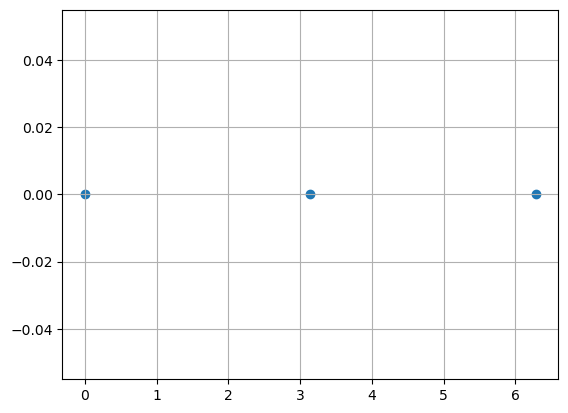

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(); plt.scatter([0, np.pi, 2*np.pi], [0, 0, 0]); plt.grid()

No hay seguridad de cómo se conectan estos puntos, pero sabes que están conectados. Hay infinitas formas en las que estos puntos se pueden conectar.

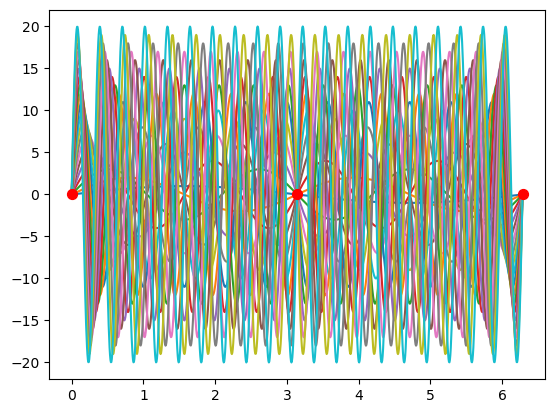

In [2]:
x = np.linspace(0, 2*np.pi, 1000); plt.figure(); 
for i in range(20) :
    y = (i+1)*np.sin((i+1)*x); plt.plot(x, y)
plt.scatter([0, np.pi, 2*np.pi], [0, 0, 0], s=50, c="r", zorder=3)

Hay tanta incertidumbre que decides pedir más información y te dan otro punto.

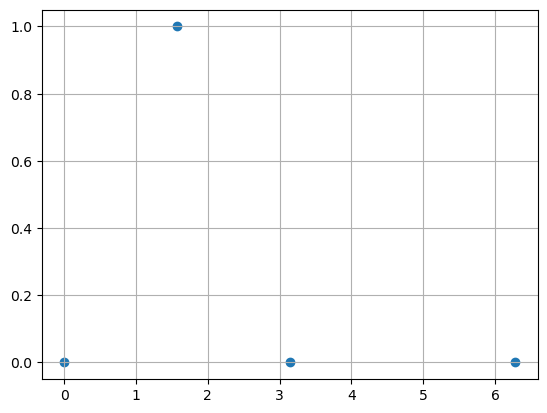

In [3]:
plt.figure(); plt.scatter([0, np.pi, 2*np.pi, np.pi/2], [0, 0, 0, 1]); plt.grid()

Con esta nueva información actualizas tus creencias y reduces la cantidad de formas en las que se conectan estos puntos (siguen siendo infinitas).

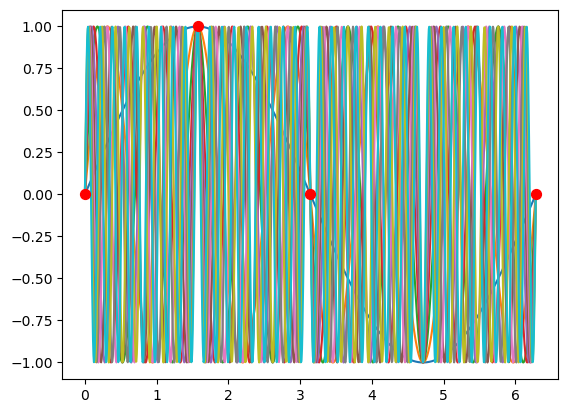

In [4]:
x = np.linspace(0, 2*np.pi, 1000); plt.figure(); 
for i in range(10) :
    y = np.sin((4*i+1)*x); plt.plot(x, y)
plt.scatter([0, np.pi, 2*np.pi, np.pi/2], [0, 0, 0, 1], s=50, c="r", zorder=3)

Te pones a pensar: "Sí. Teóricamente hay infinitas funciones que pueden conectar estos puntos, pero sólo algunas tienen sentido dado mi contexto."

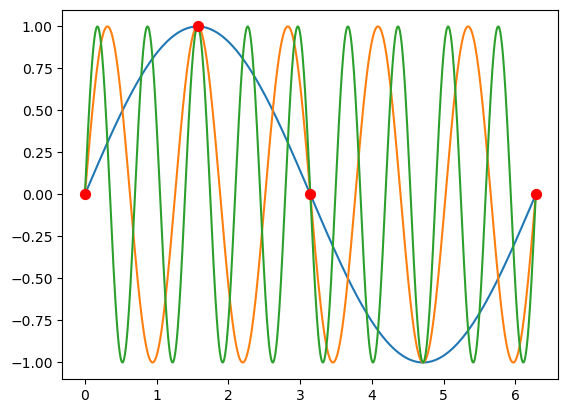

In [5]:
x = np.linspace(0, 2*np.pi, 1000); plt.figure(); 
for i in range(3) :
    y = np.sin((4*i+1)*x); plt.plot(x, y)
plt.scatter([0, np.pi, 2*np.pi, np.pi/2], [0, 0, 0, 1], s=50, c="r", zorder=3)

Ahora sólo quedan algunos pocos candidatos dado el criterio que tienes. Hay incertidumbre sobre cuál de estos candidatos podría ser el que mejor se ajusta, así que decides pedir más información. ¿Qué información serviría más?
- Se podría pedir el valor de $y$ cuando $x=\frac{3\pi}{2}$, pero los candidatos que tenemos todos pasan por el mismo punto. Incluso si nos dieran la información, no ayudaría de mucho.
- Se podría pedir fuera del rango que tenemos, pero quizás la información no existe o dado el contexto del problema es imposible que estos puntos existan.

Nos asignan nuestro último punto.

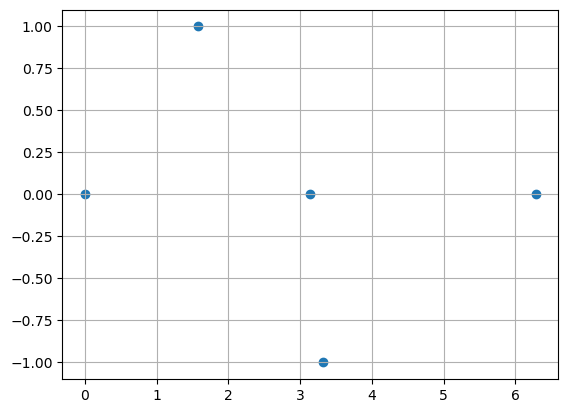

In [6]:
plt.figure(); plt.scatter([0, np.pi, 2*np.pi, np.pi/2, 19*np.pi/18], [0, 0, 0, 1, -1]); plt.grid()

Usamos esta nueva información (evidencia) junto con lo que conocíamos (anterior) y lo que creemos que es posible (verosimilitud) para decidir sobre una nueva función (posterior).

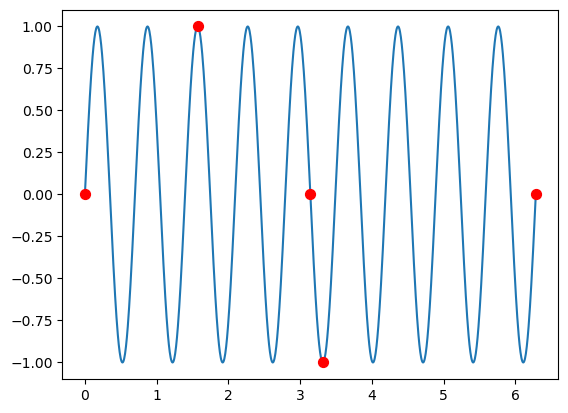

In [7]:
x = np.linspace(0, 2*np.pi, 1000); plt.figure(); y = np.sin(9*x); plt.plot(x, y)
plt.scatter([0, np.pi, 2*np.pi, np.pi/2, 19*np.pi/18], [0, 0, 0, 1, -1], s=50, c="r", zorder=3)

Una forma de realizar este experimento es mediante un proceso gaussiano, que asume que la variable de salida es una variable aleatoria con distribución normal multivariada. Utilicemos la función que encontramos y asumamos que no sabemos cuál es.

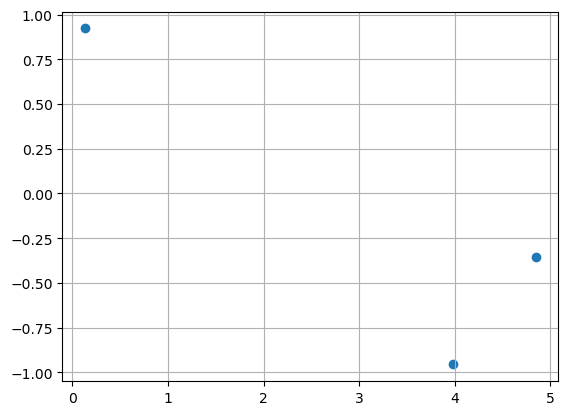

In [8]:
np.random.seed(10)
def f(x) :
    return np.sin(9*x)

X = np.random.uniform(0, 2*np.pi, 3).reshape([-1, 1])
plt.figure(); plt.scatter(X, f(X)); plt.grid()

Realizamos una regresión de proceso gaussiano para encontrar distribuciones que podrían darnos estas muestras

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF
import warnings
warnings.filterwarnings("ignore")

In [10]:
kernel = 1 * RBF(length_scale=1.0)
gp = GPR(kernel=kernel, n_restarts_optimizer=10)
y = f(X)
gp.fit(X, y)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10)

Creamos un vector de valores posibles de $x$ y predecimos $y$ usando el resultado de la regresión.

In [11]:
x = np.linspace(0, 5, 1000).reshape([-1, 1])
pred = gp.predict(x)

Graficamos nuestra primera propuesta, utilizando el error estándar para dibujar nuestros intervalos de confianza.

Text(0, 0.5, 'f(x)')

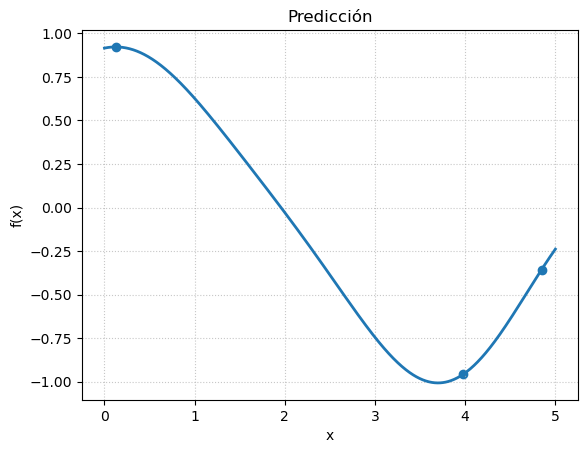

In [12]:
plt.plot(x, pred, lw=2)
plt.scatter(X, f(X))
plt.grid(linestyle=":", alpha=0.7)
plt.title("Predicción")
plt.xlabel("x")
plt.ylabel("f(x)")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


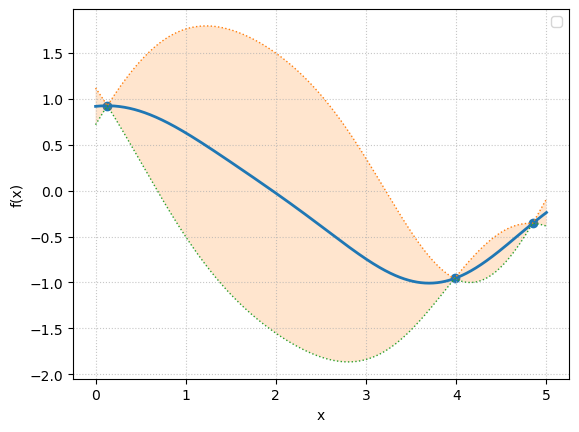

In [13]:
y_pred, std = gp.predict(x, return_std=True) 
nc = 1.96
y_upper = y_pred + nc * std
y_lower = y_pred - nc * std
plt.plot(x, pred, lw=2)
plt.scatter(X, f(X))
plt.grid(linestyle=":", alpha=0.7)
plt.plot(x, y_upper, ls=":", lw=1)
plt.plot(x, y_lower, ls=":", lw=1)
plt.fill_between(x.ravel(), y_lower, y_upper, alpha=0.2)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

Podemos ver que necesitamos más muestras debido a que hay mucha incertidumbre en algunas partes de nuestro dominio. Hay varios criterios para decidir cómo pedir muestras:
- Maximizar (busco mi predicción del máximo actual y pido esa medida)
- Minimizar (busco mi predicción del mínimo actual y pido esa medida)
- Reducir incertidumbre (busco el punto donde mi intervalo de confianza es más grande y pido esa medida)

Y repetimos el proceso ya con nueva información.

In [14]:
max_std_index = np.argmax(std)
x_val = x[max_std_index]
y_val = f(x_val)
print(f"Valor de x con mayor std: {x_val}")
print(f"Valor de std máximo: {std[max_std_index]}")
print(f"Predicción en ese punto: {y_val}")

Valor de x con mayor std: [1.98198198]
Valor de std máximo: 0.7770280645647687
Predicción en ese punto: [-0.84774438]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


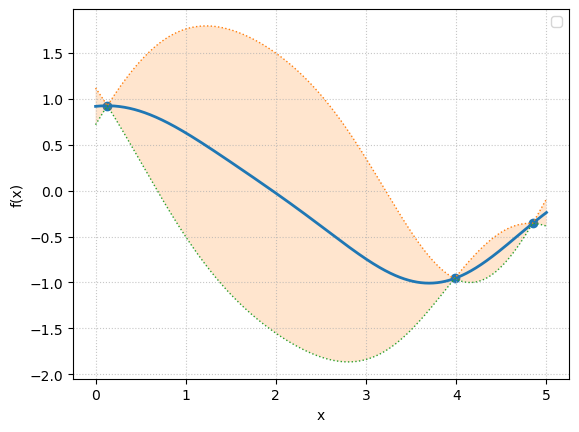

In [15]:
plt.plot(x, pred, lw=2)
plt.scatter(X, f(X))
plt.grid(linestyle=":", alpha=0.7)
plt.plot(x, y_upper, ls=":", lw=1)
plt.plot(x, y_lower, ls=":", lw=1)
plt.fill_between(x.ravel(), y_lower, y_upper, alpha=0.2)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

In [16]:
X_nueva = np.vstack([X, x_val]) 
y = f(X_nueva)
gp.fit(X_nueva, y)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10)

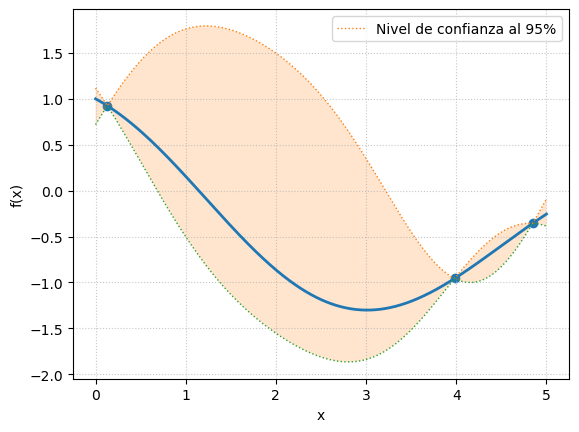

In [17]:
x = np.linspace(0, 5, 1000).reshape([-1, 1])
pred = gp.predict(x)
plt.plot(x, pred, lw=2)
plt.scatter(X, f(X))
plt.grid(linestyle=":", alpha=0.7)
plt.plot(x, y_upper, ls=":", lw=1, label="Nivel de confianza al 95%")
plt.plot(x, y_lower, ls=":", lw=1)
plt.fill_between(x.ravel(), y_lower, y_upper, alpha=0.2)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

Repitamos el proceso 30 veces con una función distinta.

$$ f(x) = \sin{(\frac{x}{3})} + \cos{(2x)},\ \ \ \ x \in [-5\pi, 5\pi] $$

C:\Users\Michelle Trigo\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


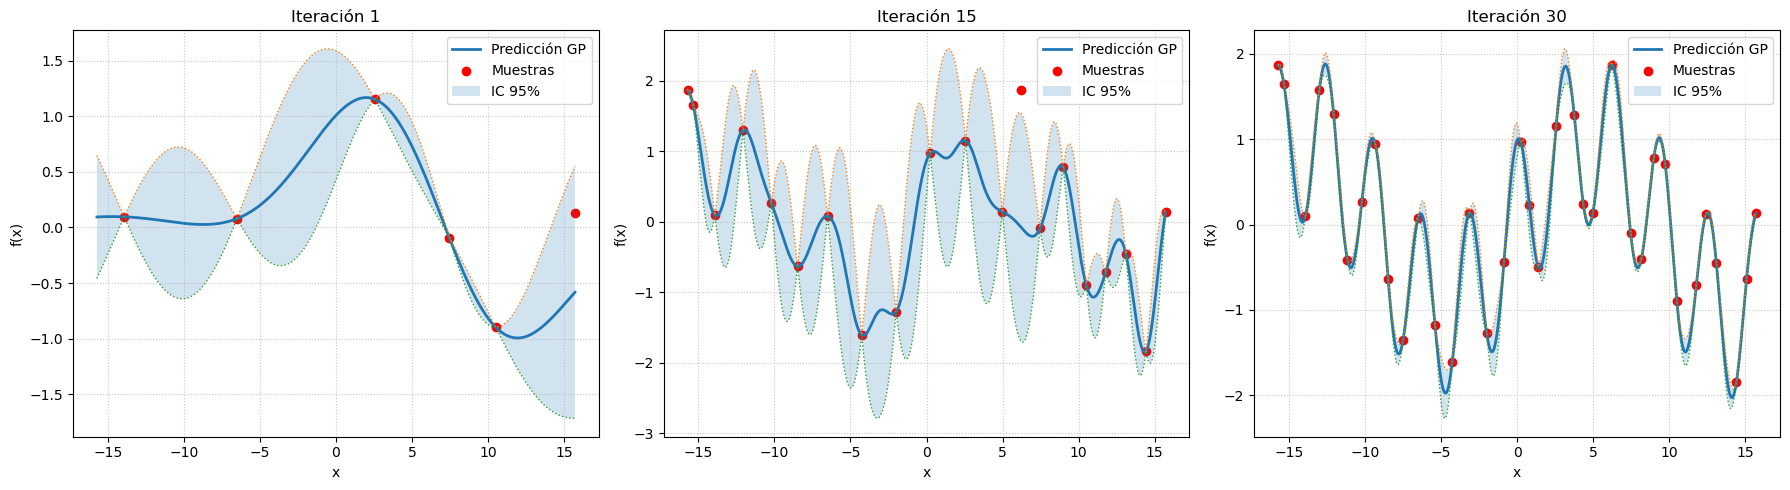

In [3]:
# Función objetivo
def f(x):
    return np.sin(x/3) + np.cos(2*x)

# Dominio
X = np.random.uniform(-5*np.pi, 5*np.pi, 5).reshape(-1,1) 
y = f(X)

# Kernel y GP
kernel = 1 * RBF(length_scale=1.0)
gp = GPR(kernel=kernel, n_restarts_optimizer=10)
gp.fit(X, y)

# Puntos de predicción
x_pred = np.linspace(-5*np.pi, 5*np.pi, 1000).reshape(-1,1)

iteraciones_clave = [1, 15, 30]
predicciones = {}
stds = {}

for i in range(1, 31):
    y_pred, std = gp.predict(x_pred, return_std=True)
    
    if i in iteraciones_clave:
        predicciones[i] = y_pred
        stds[i] = std.copy()
    
    # Encontramos el punto con mayor incertidumbre
    max_std_index = np.argmax(std)
    x_val = x_pred[max_std_index].reshape(1, -1)
    
    # Agregamos la nueva muestra y re-ajustamos el GP
    X = np.vstack([X, x_val])
    y = f(X)
    gp.fit(X, y)

# Graficamos las iteraciones clave
plt.figure(figsize=(18,5))

for idx, iter_num in enumerate(iteraciones_clave):
    y_pred = predicciones[iter_num]
    std = stds[iter_num]
    y_upper = y_pred + 1.96*std
    y_lower = y_pred - 1.96*std
    
    plt.subplot(1, 3, idx+1)
    plt.plot(x_pred, y_pred, lw=2, label='Predicción GP')
    plt.scatter(X[:5+iter_num], f(X[:5+iter_num]), color='red', label='Muestras')
    plt.fill_between(x_pred.ravel(), y_lower, y_upper, alpha=0.2, label='IC 95%')
    plt.plot(x_pred, y_upper, ls=":", lw=1)
    plt.plot(x_pred, y_lower, ls=":", lw=1)
    plt.title(f'Iteración {iter_num}')
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(linestyle=":", alpha=0.7)
    plt.legend()

plt.tight_layout()
plt.show()

El modelo selecciona los nuevos puntos donde tiene mayor incertidumbre.
En las primeras iteraciones, las áreas sin datos tienen una banda azul muy ancha, indicando que el modelo no sabe bien cómo se comporta la función allí. Al elegir los puntos más inciertos, el modelo Va reduciendo la incertidumbre.

Hacia la última iteración, las bandas azules se vuelven mucho más estrechas, lo que muestra que el modelo ya tiene confianza en casi todo el rango. La estrategia de “max std” permite al modelo explorar de manera equilibrada todo el espacio y aprender tanto los máximos como los mínimos, logrando una aproximación más completa de la función real.


### Actividad

1. Modificar el comportamiento de selección para elegir el máximo de las predicciones como el siguiente punto.
2. Modificar el comportamiento de selección para elegir el mínimo de las predicciones como el siguiente punto.

### 1.

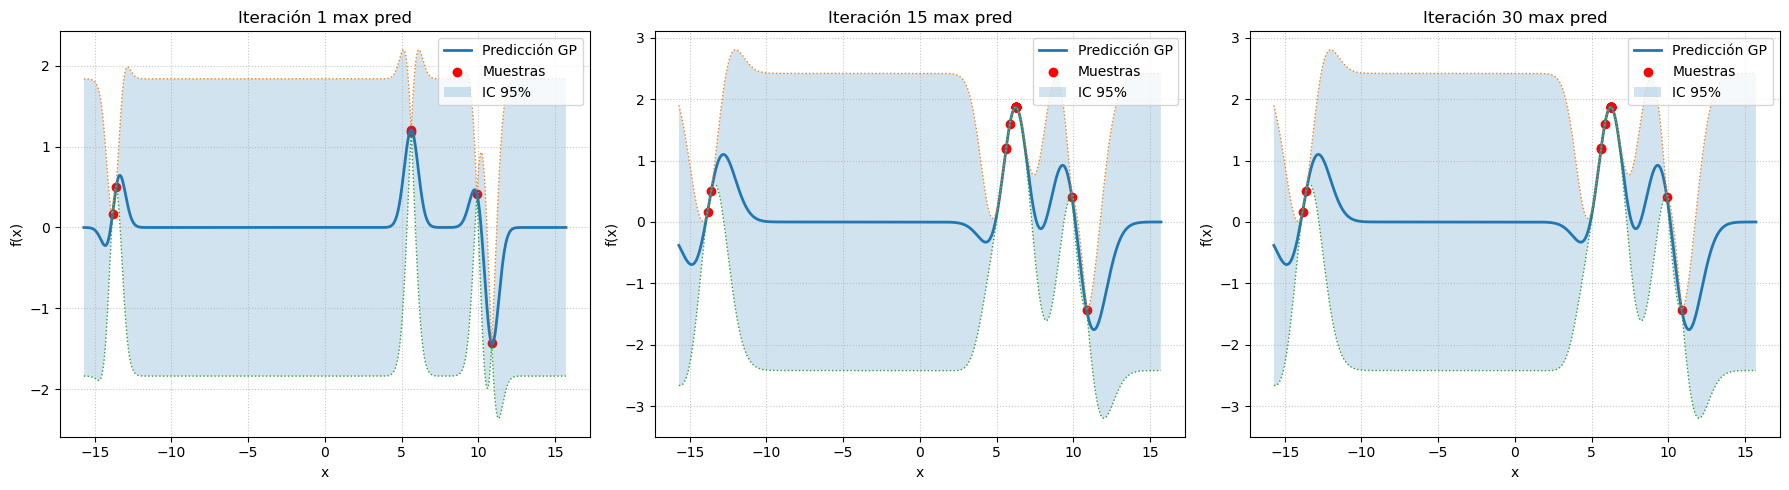

In [14]:
# Función objetivo
def f(x):
    return np.sin(x/3) + np.cos(2*x)

# Dominio
X = np.random.uniform(-5*np.pi, 5*np.pi, 5).reshape(-1,1) 
y = f(X)

# Kernel y GP
kernel = 1 * RBF(length_scale=1.0)
gp = GPR(kernel=kernel, n_restarts_optimizer=10)
gp.fit(X, y)

# Puntos de predicción
x_pred = np.linspace(-5*np.pi, 5*np.pi, 1000).reshape(-1,1)

iteraciones_clave = [1, 15, 30]
predicciones = {}
stds = {}

for i in range(1, 31):
    y_pred, std = gp.predict(x_pred, return_std=True)
    
    if i in iteraciones_clave:
        predicciones[i] = y_pred
        stds[i] = std.copy()
    
    # Encontramos el punto con mayor valor predicho
    max_pred_index = np.argmax(y_pred)
    x_val = x_pred[max_pred_index].reshape(1, -1)

    
    # Agregamos la nueva muestra y re-ajustamos el GP
    X = np.vstack([X, x_val])
    y = f(X)
    gp.fit(X, y)

# Graficamos
plt.figure(figsize=(18,5))

for idx, iter_num in enumerate(iteraciones_clave):
    y_pred = predicciones[iter_num]
    std = stds[iter_num]
    y_upper = y_pred + 1.96*std
    y_lower = y_pred - 1.96*std
    
    plt.subplot(1, 3, idx+1)
    plt.plot(x_pred, y_pred, lw=2, label='Predicción GP')
    plt.scatter(X[:5+iter_num], f(X[:5+iter_num]), color='red', label='Muestras')
    plt.fill_between(x_pred.ravel(), y_lower, y_upper, alpha=0.2, label='IC 95%')
    plt.plot(x_pred, y_upper, ls=":", lw=1)
    plt.plot(x_pred, y_lower, ls=":", lw=1)
    plt.title(f'Iteración {iter_num} max pred')
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(linestyle=":", alpha=0.7)
    plt.legend()

plt.tight_layout()
plt.show()

En el caso de max pred, el modelo elige siempre los puntos donde cree que la función es más alta. Con el paso de las iteraciones, va aprendiendo mejor las zonas de picos y ajustando su predicción en esas regiones, pero deja sin explorar los valles. En otras palabras, se enfoca en conocer muy bien los máximos de la función.

### 2.

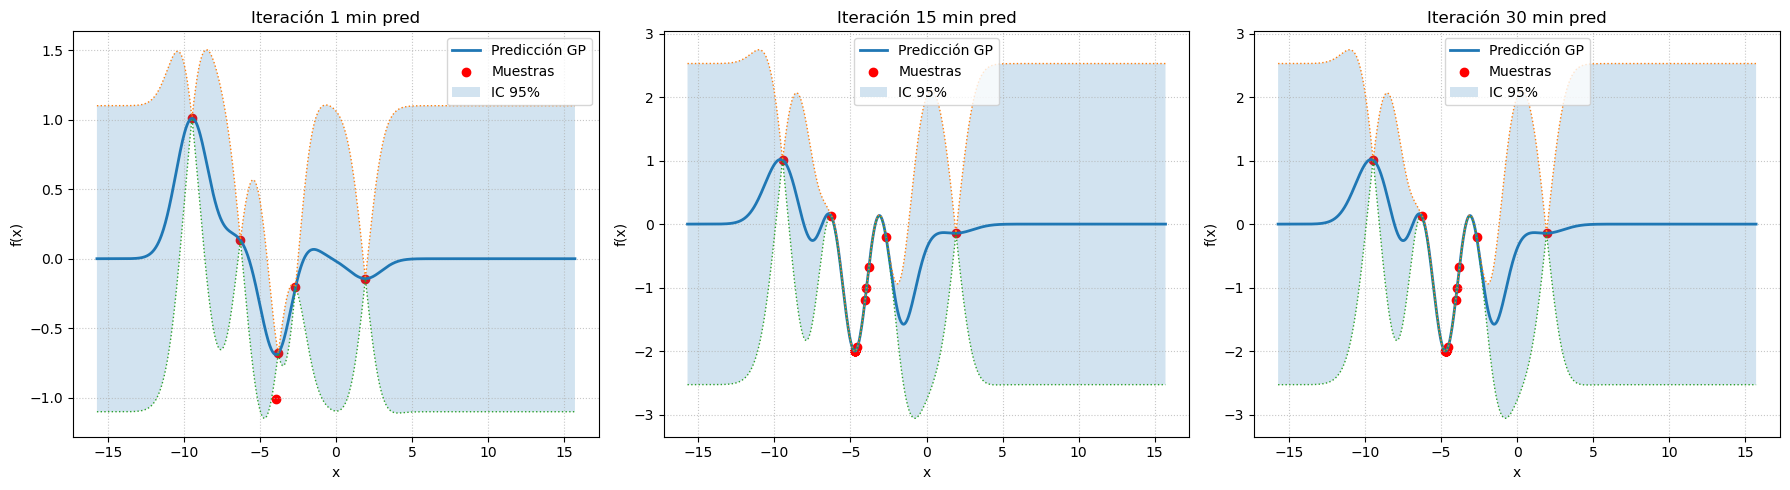

In [17]:
# Función objetivo
def f(x):
    return np.sin(x/3) + np.cos(2*x)

# Dominio
X = np.random.uniform(-5*np.pi, 5*np.pi, 5).reshape(-1,1) 
y = f(X)

# Kernel y GP
kernel = 1 * RBF(length_scale=1.0)
gp = GPR(kernel=kernel, n_restarts_optimizer=10)
gp.fit(X, y)

# Puntos de predicción
x_pred = np.linspace(-5*np.pi, 5*np.pi, 1000).reshape(-1,1)

iteraciones_clave = [1, 15, 30]
predicciones = {}
stds = {}

for i in range(1, 31):
    y_pred, std = gp.predict(x_pred, return_std=True)
    
    if i in iteraciones_clave:
        predicciones[i] = y_pred
        stds[i] = std.copy()
    
    # Encontramos el punto con menor valor predicho
    min_pred_index = np.argmin(y_pred)
    x_val = x_pred[min_pred_index].reshape(1, -1)
    
    # Agregamos la nueva muestra y re-ajustamos el GP
    X = np.vstack([X, x_val])
    y = f(X)
    gp.fit(X, y)

# Graficamos las iteraciones clave
plt.figure(figsize=(18,5))

for idx, iter_num in enumerate(iteraciones_clave):
    y_pred = predicciones[iter_num]
    std = stds[iter_num]
    y_upper = y_pred + 1.96*std
    y_lower = y_pred - 1.96*std
    
    plt.subplot(1, 3, idx+1)
    plt.plot(x_pred, y_pred, lw=2, label='Predicción GP')
    plt.scatter(X[:5+iter_num], f(X[:5+iter_num]), color='red', label='Muestras')
    plt.fill_between(x_pred.ravel(), y_lower, y_upper, alpha=0.2, label='IC 95%')
    plt.plot(x_pred, y_upper, ls=":", lw=1)
    plt.plot(x_pred, y_lower, ls=":", lw=1)
    plt.title(f'Iteración {iter_num} min pred')
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(linestyle=":", alpha=0.7)
    plt.legend()

plt.tight_layout()
plt.show()

En el caso de min pred, ocurre lo contrario, el modelo selecciona los puntos donde la función parece más baja. Así, termina aprendiendo principalmente las zonas con valores mínimos y descuida los picos. Este comportamiento hace que el modelo sea más preciso en los mínimos de la función.